## Aplicacion de Técnicas de balanceo de datos

Se aplican los metodos de:

- RANDOM OVERSAMPLING
- RANDOM UNDERSAMPLING
- SMOTE
- ADASYN
- TOMEK LINKS

Estos metodos de aplican sobre el dataset optimizado por las tecnicas de Ingenieria de Caracteristicas aplicadas

In [1]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_transformed.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.shape

(6435823, 16)

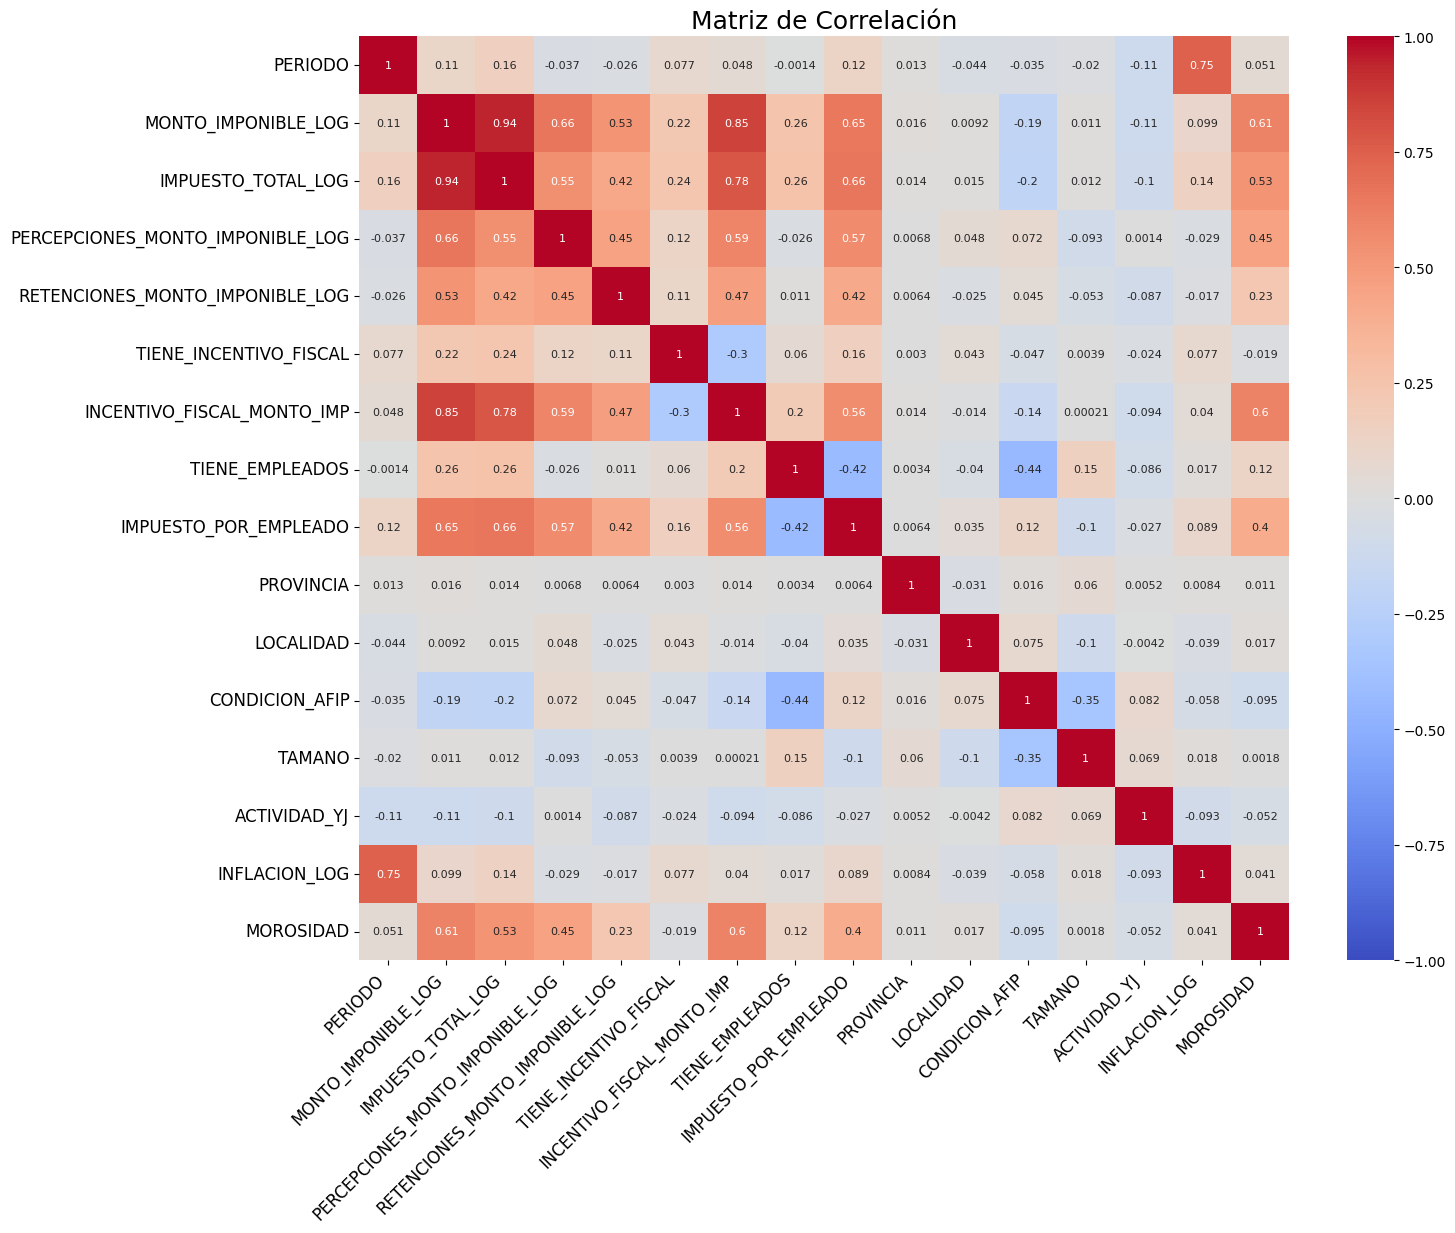

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation_matrix = dataset_work_3.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

Distribución original en y_train: Counter({0: 2615570, 1: 1889506})


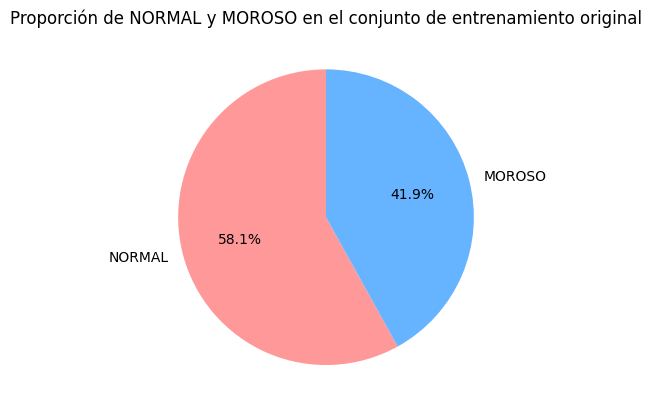

In [3]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from collections import Counter

# Definir variables dependientes (X) e independientes (y)
X = dataset_work_3.iloc[:, :-1]  # Todas las columnas menos la última (características)
y = dataset_work_3.iloc[:, -1]   # La última columna es la variable objetivo (morosidad)

# Dividimos el conjunto de datos en entrenamiento y prueba (70% entrenamiento y 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Ver la distribución de las clases en el conjunto de entrenamiento antes de SMOTE
print("Distribución original en y_train:", Counter(y_train))

# Generar gráfico de la distribución original
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train)[0], Counter(y_train)[1]]
colors = ['#ff9999','#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento original")
plt.show()


### Aplicamos RANDOM OVERSAMPLING a los datos de entrenamiento

Distribución después de Random Oversampling en y_train_ros: Counter({0: 2615570, 1: 2615570})


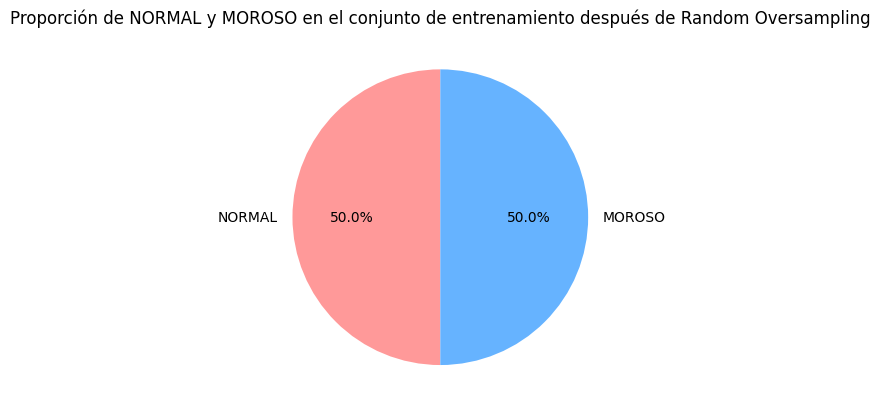

In [4]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar Random Oversampling al conjunto de entrenamiento para balancear las clases
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de Random Oversampling
print("Distribución después de Random Oversampling en y_train_ros:", Counter(y_train_ros))

# Generar gráfico de la distribución balanceada después de Random Oversampling
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_ros)[0], Counter(y_train_ros)[1]]
colors = ['#ff9999', '#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de Random Oversampling")
plt.show()


### Aplicamos RANDOM UNDERSAMPLING a los datos de entrenamiento

Distribución después de Random Undersampling en y_train_rus: Counter({0: 1889506, 1: 1889506})


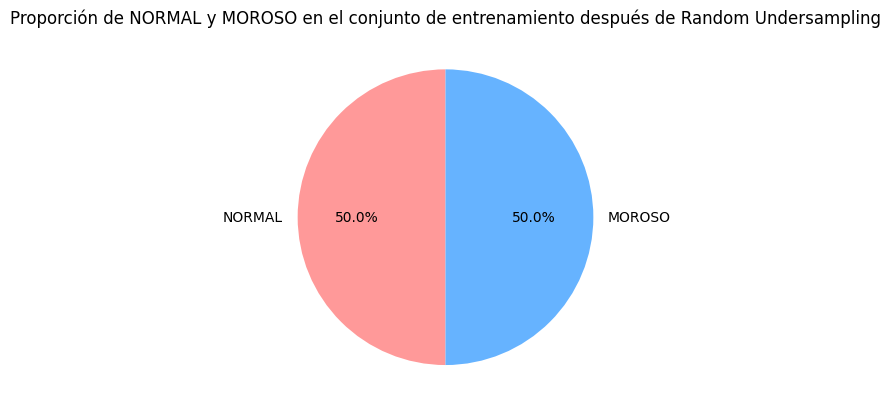

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt

# Aplicar Random Undersampling al conjunto de entrenamiento para balancear las clases
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de Random Undersampling
print("Distribución después de Random Undersampling en y_train_rus:", Counter(y_train_rus))

# Generar gráfico de la distribución balanceada después de Random Undersampling
fig, ax = plt.subplots()
etiquetas = ['NORMAL', 'MOROSO']
tamaños = [Counter(y_train_rus)[0], Counter(y_train_rus)[1]]
colores = ['#ff9999', '#66b3ff']
ax.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de Random Undersampling")
plt.show()


### Aplicamos SMOTE a los datos de entrenamiento

Distribución después de SMOTE en y_train_smote: Counter({0: 2615570, 1: 2615570})


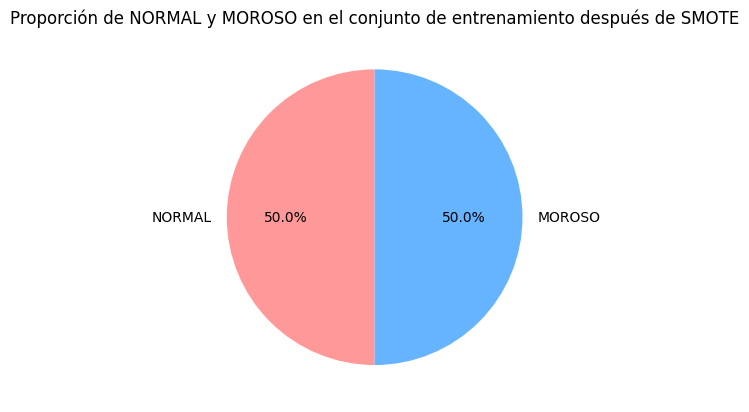

El tiempo total de ejecución fue de 1 minutos y 44.79 segundos.


In [6]:
from imblearn.over_sampling import SMOTE
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Aplicar SMOTE al conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de SMOTE
print("Distribución después de SMOTE en y_train_smote:", Counter(y_train_smote))


# Generar gráfico de la distribución balanceada después de SMOTE
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_smote)[0], Counter(y_train_smote)[1]]
colors = ['#ff9999','#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de SMOTE")
plt.show()

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

### Aplicamos ADASYN a los datos de entrenamiento

Distribución después de ADASYN en y_train_adasyn: Counter({0: 2615570, 1: 2351869})


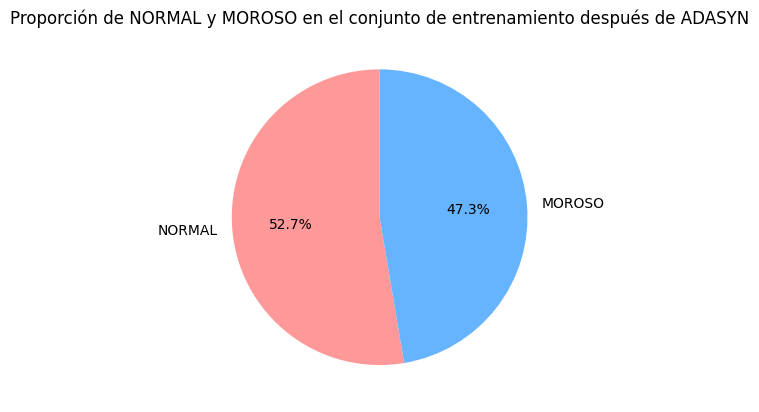

El tiempo total de ejecución fue de 3 minutos y 23.16 segundos.


In [7]:
from imblearn.over_sampling import ADASYN

# Medir el tiempo de inicio
start_time = time.time()
 
# Aplicar ADASYN al conjunto de entrenamiento para balancear las clases
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de ADASYN
print("Distribución después de ADASYN en y_train_adasyn:", Counter(y_train_adasyn))

# Generar gráfico de la distribución balanceada después de ADASYN
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_adasyn)[0], Counter(y_train_adasyn)[1]]
colors = ['#ff9999','#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de ADASYN")
plt.show()


# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

### Aplicamos TOMEK LINK a los datos de entrenamiento

Distribución después de Tomek Links en y_train_tomek: Counter({0: 2281766, 1: 1889506})


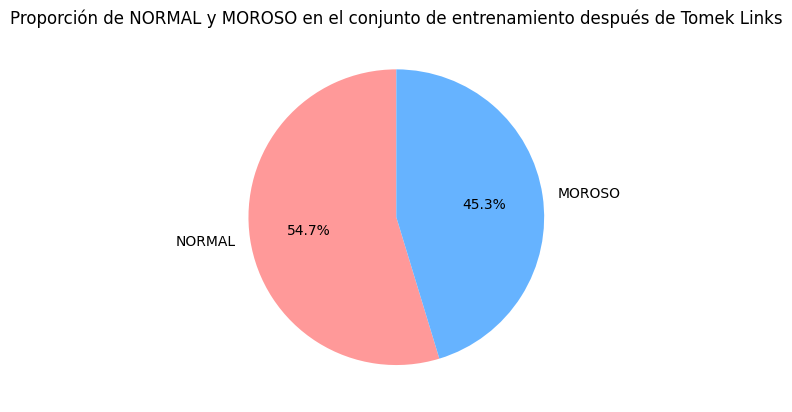

El tiempo total de ejecución fue de 9 minutos y 30.44 segundos.


In [8]:
from imblearn.under_sampling import TomekLinks

# Medir el tiempo de inicio
start_time = time.time()

# Aplicar Tomek Links al conjunto de entrenamiento para balancear las clases
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Ver la distribución de las clases después de aplicar Tomek Links
print("Distribución después de Tomek Links en y_train_tomek:", Counter(y_train_tomek))

# Generar gráfico de la distribución balanceada después de aplicar Tomek Links
fig, ax = plt.subplots()
labels = ['NORMAL', 'MOROSO']
sizes = [Counter(y_train_tomek)[0], Counter(y_train_tomek)[1]]
colors = ['#ff9999', '#66b3ff']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporción de NORMAL y MOROSO en el conjunto de entrenamiento después de Tomek Links")
plt.show()

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")


### Resguardamos los datos en DataSet

Estos datos son guardados en archivos para poder cargarlos a posterior y no tener que volver a balancear los datos por los distintos metodos debido al tiempo que consume

In [9]:
# Guardar los datos de training balanceados en archivos CSV para no tener que volver a procesar el BALANCEO en posteriores pruebas.

# Guardar los datos de test en archivos CSV
X_test.to_csv('D:\DataSet\X_test.csv', index=False)
y_test.to_csv('D:\DataSet\y_test.csv', index=False)

# Guardar los datos de train en archivos CSV
X_train.to_csv('D:\DataSet\X_train.csv', index=False)
y_train.to_csv('D:\DataSet\y_train.csv', index=False)

# SMOTE
X_train_smote.to_csv('D:\DataSet\X_train_smote.csv', index=False)
y_train_smote.to_csv('D:\DataSet\y_train_smote.csv', index=False)

# ADASYN
X_train_adasyn.to_csv('D:\DataSet\X_train_adasyn.csv', index=False)
y_train_adasyn.to_csv('D:\DataSet\y_train_adasyn.csv', index=False)


# TOMEK LINK
X_train_tomek.to_csv('D:\DataSet\X_train_tomek.csv', index=False)
y_train_tomek.to_csv('D:\DataSet\y_train_tomek.csv', index=False)


### 1. **Evaluación de métricas específicas para el desequilibrio de clases**
En un conjunto de datos desbalanceado, las métricas de evaluación tradicionales como el **accuracy** (exactitud) pueden ser engañosas, ya que un modelo podría obtener una alta precisión simplemente prediciendo la clase mayoritaria en todos los casos. En su lugar, es importante utilizar métricas que evalúen el rendimiento de las clases minoritarias y mayoritarias por separado.

#### Métricas a considerar:
- **Precision**: Qué porcentaje de las predicciones positivas son realmente positivas. Útil para evaluar la tasa de falsos positivos.
- **Recall (Sensibilidad)**: Qué porcentaje de las verdaderas instancias positivas fueron correctamente identificadas. Útil para evaluar los falsos negativos.
- **F1-Score**: La media armónica entre Precision y Recall. Es especialmente útil en problemas desbalanceados porque equilibra los falsos positivos y los falsos negativos.
- **Matriz de confusión**: Para visualizar cómo se comporta el modelo en cada clase (verdaderos positivos, verdaderos negativos, falsos positivos, falsos negativos).
- **AUC-ROC (Área bajo la curva ROC)**: Mide la capacidad del modelo para distinguir entre clases. Una curva ROC cerca de 1 indica un buen desempeño del modelo.

# Regresion Logistica

### Datos Optimizados sin Balanceo

In [15]:
# Importamos las librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Regresión Logística con los datos sin balancear
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")


C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[821468 299491]
 [154525 655263]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78   1120959
           1       0.69      0.81      0.74    809788

    accuracy                           0.76   1930747
   macro avg       0.76      0.77      0.76   1930747
weighted avg       0.78      0.76      0.77   1930747

ROC AUC: 0.8668
El tiempo total de ejecución fue de 0 minutos y 43.00 segundos.


### Datos balanceados con SMOTE

In [16]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Regresion Logistica con los datos balanceados
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[763176 357783]
 [ 86673 723115]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77   1120959
           1       0.67      0.89      0.76    809788

    accuracy                           0.77   1930747
   macro avg       0.78      0.79      0.77   1930747
weighted avg       0.80      0.77      0.77   1930747

ROC AUC: 0.8657
El tiempo total de ejecución fue de 0 minutos y 45.04 segundos.


### Datos balanceados con ADASYN

In [17]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()


# Entrenar un modelo de Regresion Logistica con los datos balanceados
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_adasyn, y_train_adasyn)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[775661 345298]
 [100824 708964]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.69      0.78   1120959
           1       0.67      0.88      0.76    809788

    accuracy                           0.77   1930747
   macro avg       0.78      0.78      0.77   1930747
weighted avg       0.80      0.77      0.77   1930747

ROC AUC: 0.8642
El tiempo total de ejecución fue de 0 minutos y 45.50 segundos.


### Datos balanceados con TOMEK LINK

In [18]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Regresion Logistica con los datos balanceados
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tomek, y_train_tomek)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[762995 357964]
 [ 83760 726028]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78   1120959
           1       0.67      0.90      0.77    809788

    accuracy                           0.77   1930747
   macro avg       0.79      0.79      0.77   1930747
weighted avg       0.80      0.77      0.77   1930747

ROC AUC: 0.8671
El tiempo total de ejecución fue de 0 minutos y 41.31 segundos.


# Arboles de Decision

### Datos Optimizados sin Balanceo

In [19]:
# Importamos las librerías necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Árbol de Decisión con los datos sin balancear
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Usamos X_train y y_train 

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = dt_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")


Matriz de confusión:
[[946327 174632]
 [183761 626027]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84   1120959
           1       0.78      0.77      0.78    809788

    accuracy                           0.81   1930747
   macro avg       0.81      0.81      0.81   1930747
weighted avg       0.81      0.81      0.81   1930747

ROC AUC: 0.8113
El tiempo total de ejecución fue de 1 minutos y 18.01 segundos.


### Datos balanceados con SMOTE

In [20]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Árbol de Decisión con los datos balanceados
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)


# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = dt_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[947254 173705]
 [172164 637624]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85   1120959
           1       0.79      0.79      0.79    809788

    accuracy                           0.82   1930747
   macro avg       0.82      0.82      0.82   1930747
weighted avg       0.82      0.82      0.82   1930747

ROC AUC: 0.8189
El tiempo total de ejecución fue de 1 minutos y 36.80 segundos.


### Datos balanceados con ADASYN

In [21]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Árbol de Decisión con los datos balanceados
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_adasyn, y_train_adasyn)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = dt_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[947487 173472]
 [172721 637067]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85   1120959
           1       0.79      0.79      0.79    809788

    accuracy                           0.82   1930747
   macro avg       0.82      0.82      0.82   1930747
weighted avg       0.82      0.82      0.82   1930747

ROC AUC: 0.8187
El tiempo total de ejecución fue de 1 minutos y 31.06 segundos.


### Datos balanceados con TOMEK LINK

In [22]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Árbol de Decisión con los datos balanceados
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tomek, y_train_tomek)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = dt_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[906683 214276]
 [148026 661762]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83   1120959
           1       0.76      0.82      0.79    809788

    accuracy                           0.81   1930747
   macro avg       0.81      0.81      0.81   1930747
weighted avg       0.82      0.81      0.81   1930747

ROC AUC: 0.8158
El tiempo total de ejecución fue de 1 minutos y 8.64 segundos.


# Random Forest

### Datos Optimizados sin Balanceo

In [23]:
# Importamos las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Random Forest con los datos balanceados
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[930731 190228]
 [128202 681586]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85   1120959
           1       0.78      0.84      0.81    809788

    accuracy                           0.84   1930747
   macro avg       0.83      0.84      0.83   1930747
weighted avg       0.84      0.84      0.84   1930747

ROC AUC: 0.9281
El tiempo total de ejecución fue de 24 minutos y 26.12 segundos.


### Datos balanceados con SMOTE

In [24]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Random Forest con los datos balanceados
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[922536 198423]
 [116048 693740]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85   1120959
           1       0.78      0.86      0.82    809788

    accuracy                           0.84   1930747
   macro avg       0.83      0.84      0.83   1930747
weighted avg       0.84      0.84      0.84   1930747

ROC AUC: 0.9291
El tiempo total de ejecución fue de 30 minutos y 42.03 segundos.


### Datos balanceados con ADASYN

In [25]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Random Forest con los datos balanceados
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[923648 197311]
 [115083 694705]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86   1120959
           1       0.78      0.86      0.82    809788

    accuracy                           0.84   1930747
   macro avg       0.83      0.84      0.84   1930747
weighted avg       0.84      0.84      0.84   1930747

ROC AUC: 0.9297
El tiempo total de ejecución fue de 26 minutos y 6.54 segundos.


### Datos balanceados con TOMEK LINK

In [26]:
from sklearn.ensemble import RandomForestClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar un modelo de Random Forest con los datos balanceados
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tomek, y_train_tomek)

# Hacer predicciones en el conjunto de prueba (sin aplicar SMOTE en los datos de prueba)
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[852449 268510]
 [ 71065 738723]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83   1120959
           1       0.73      0.91      0.81    809788

    accuracy                           0.82   1930747
   macro avg       0.83      0.84      0.82   1930747
weighted avg       0.84      0.82      0.83   1930747

ROC AUC: 0.9234
El tiempo total de ejecución fue de 17 minutos y 39.85 segundos.


# Redes Neuronales

### Datos Optimizados sin Balanceo

In [27]:
from sklearn.neural_network import MLPClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de Redes Neuronales
mlp_model = MLPClassifier(max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = mlp_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[1120959       0]
 [ 809788       0]]

Reporte de clasificación:


C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           0       0.58      1.00      0.73   1120959
           1       0.00      0.00      0.00    809788

    accuracy                           0.58   1930747
   macro avg       0.29      0.50      0.37   1930747
weighted avg       0.34      0.58      0.43   1930747

ROC AUC: 0.5000
El tiempo total de ejecución fue de 19 minutos y 8.36 segundos.


### Datos balanceados con SMOTE

In [28]:
from sklearn.neural_network import MLPClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de Redes Neuronales
mlp_model = MLPClassifier(max_iter=500, random_state=42)
mlp_model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred = mlp_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[      0 1120959]
 [      0  809788]]

Reporte de clasificación:


C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           0       0.00      0.00      0.00   1120959
           1       0.42      1.00      0.59    809788

    accuracy                           0.42   1930747
   macro avg       0.21      0.50      0.30   1930747
weighted avg       0.18      0.42      0.25   1930747

ROC AUC: 0.5000
El tiempo total de ejecución fue de 20 minutos y 15.34 segundos.


### Datos balanceados con ADASYN

In [29]:
from sklearn.neural_network import MLPClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de Redes Neuronales
mlp_model = MLPClassifier(max_iter=500, random_state=42)
mlp_model.fit(X_train_adasyn, y_train_adasyn)

# Hacer predicciones en el conjunto de prueba
y_pred = mlp_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[1120959       0]
 [ 809788       0]]

Reporte de clasificación:


C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           0       0.58      1.00      0.73   1120959
           1       0.00      0.00      0.00    809788

    accuracy                           0.58   1930747
   macro avg       0.29      0.50      0.37   1930747
weighted avg       0.34      0.58      0.43   1930747

ROC AUC: 0.5000
El tiempo total de ejecución fue de 21 minutos y 4.39 segundos.


### Datos balanceados con TOMEK LINK

In [30]:
from sklearn.neural_network import MLPClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de Redes Neuronales
mlp_model = MLPClassifier(max_iter=500, random_state=42)
mlp_model.fit(X_train_adasyn, y_train_adasyn)

# Hacer predicciones en el conjunto de prueba
y_pred = mlp_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

Matriz de confusión:
[[1120959       0]
 [ 809788       0]]

Reporte de clasificación:


C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           0       0.58      1.00      0.73   1120959
           1       0.00      0.00      0.00    809788

    accuracy                           0.58   1930747
   macro avg       0.29      0.50      0.37   1930747
weighted avg       0.34      0.58      0.43   1930747

ROC AUC: 0.5000
El tiempo total de ejecución fue de 20 minutos y 4.34 segundos.


# XGBoost

### Datos no balanceados

In [31]:
from xgboost import XGBClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [15:06:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de confusión:
[[894496 226463]
 [137168 672620]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83   1120959
           1       0.75      0.83      0.79    809788

    accuracy                           0.81   1930747
   macro avg       0.81      0.81      0.81   1930747
weighted avg       0.82      0.81      0.81   1930747

ROC AUC: 0.9127
El tiempo total de ejecución fue de 0 minutos y 29.62 segundos.


### Datos balanceados con SMOTE

In [32]:
from xgboost import XGBClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [15:07:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de confusión:
[[860466 260493]
 [108099 701689]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82   1120959
           1       0.73      0.87      0.79    809788

    accuracy                           0.81   1930747
   macro avg       0.81      0.82      0.81   1930747
weighted avg       0.82      0.81      0.81   1930747

ROC AUC: 0.9114
El tiempo total de ejecución fue de 0 minutos y 32.23 segundos.


### Datos balanceados con ADASYN

In [33]:
from xgboost import XGBClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_adasyn, y_train_adasyn)

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [15:07:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de confusión:
[[859555 261404]
 [106516 703272]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82   1120959
           1       0.73      0.87      0.79    809788

    accuracy                           0.81   1930747
   macro avg       0.81      0.82      0.81   1930747
weighted avg       0.82      0.81      0.81   1930747

ROC AUC: 0.9118
El tiempo total de ejecución fue de 0 minutos y 28.64 segundos.


### Datos balanceados con TOMEK LINK

In [34]:
from xgboost import XGBClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tomek, y_train_tomek)

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [15:08:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de confusión:
[[791552 329407]
 [ 51819 757969]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81   1120959
           1       0.70      0.94      0.80    809788

    accuracy                           0.80   1930747
   macro avg       0.82      0.82      0.80   1930747
weighted avg       0.84      0.80      0.80   1930747

ROC AUC: 0.9120
El tiempo total de ejecución fue de 0 minutos y 24.59 segundos.


# LightGBM

### Datos no Balanceados

In [35]:
from lightgbm import LGBMClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")


# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

[LightGBM] [Info] Number of positive: 1889506, number of negative: 2615570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 4505076, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419417 -> initscore=-0.325167
[LightGBM] [Info] Start training from score -0.325167
Matriz de confusión:
[[875573 245386]
 [130783 679005]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82   1120959
           1       0.73      0.84      0.78    809788

    accuracy                           0.81   1930747
   macro avg       0.80      0.81      0.80   1930747
weighted avg       0.81      0.81      0.81   1930747

ROC AUC: 0.9072
El tiempo 

### Datos balanceados con SMOTE

In [36]:
from lightgbm import LGBMClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred = lgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")


# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

[LightGBM] [Info] Number of positive: 2615570, number of negative: 2615570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 5231140, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Matriz de confusión:
[[840213 280746]
 [ 99097 710691]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82   1120959
           1       0.72      0.88      0.79    809788

    accuracy                           0.80   1930747
   macro avg       0.81      0.81      0.80   1930747
weighted avg       0.82      0.80      0.80   1930747

ROC AUC: 0.9059
El tiempo total de ejecución fue de 0 minutos y 33.76 segundos.


### Datos balanceados con ADASYN

In [37]:
from lightgbm import LGBMClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_adasyn, y_train_adasyn)

# Hacer predicciones en el conjunto de prueba
y_pred = lgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")


# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

[LightGBM] [Info] Number of positive: 2351869, number of negative: 2615570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 4967439, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473457 -> initscore=-0.106272
[LightGBM] [Info] Start training from score -0.106272
Matriz de confusión:
[[836868 284091]
 [ 96258 713530]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.75      0.81   1120959
           1       0.72      0.88      0.79    809788

    accuracy                           0.80   1930747
   macro avg       0.81      0.81      0.80   1930747
weighted avg       0.82      0.80      0.80   1930747

ROC AUC: 0.9062
El tiempo 

### Datos balanceados con TOMEK LINK

In [38]:
from lightgbm import LGBMClassifier
import time  # Importamos la librería para medir el tiempo

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo de LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_tomek, y_train_tomek)

# Hacer predicciones en el conjunto de prueba
y_pred = lgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular el AUC
roc_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")


# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")

[LightGBM] [Info] Number of positive: 1889506, number of negative: 2281766
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2220
[LightGBM] [Info] Number of data points in the train set: 4171272, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.452981 -> initscore=-0.188634
[LightGBM] [Info] Start training from score -0.188634
Matriz de confusión:
[[770552 350407]
 [ 43852 765936]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80   1120959
           1       0.69      0.95      0.80    809788

    accuracy                           0.80   1930747
   macro avg       0.82      0.82      0.80   1930747
weighted avg       0.84      0.80      0.80   1930747

ROC AUC: 0.9064
El tiempo 